## Proyecto TSFC: Oscilaciones en Sistemas Biológicos

## Comportamiento de Testosterona

### Hernández de la Vega Alejandro
### Rodríguez Rosenblueth César Daniel
### Santiago Santos Eva Yazmín 

# Osciladores biológicos #  

Bien sea la respiración, la elaboración de marcapasos para asistir la actividad cardiaca o la secreción de testosterona en los hombres, existen varios sistemas biológicos que exhiben un carácter oscilatorio. Una primera aproximación para el estudio de estos sistemas desemboca en ecuaciones diferenciales ordinarias del tipo:

$$\dfrac{du}{dt} = f(u)$$

Donde, para sistemas periódicos se tiene:

$$u(t+T)= u(t) $$

con el periodo $T>0$

No obstante, existen casos (como en la síntesis de enzimas durante la división celular o en el estudiado en este trabajo) donde el sistema viene regulado por un control de retroalimentación. En este sentido, el sistema viene dado por una serie de reacciones ligadas, llevándose acabo una reacción seguida de otra y en donde la primera de éstas viene regulada por una función de retroalimentación que involucra la última reacción, i.e. si tenemos n reacciones:
$$ \dfrac{d u_1}{dt} = f(u_n )k_1 u_1 $$ 
$$ \dfrac{d u_r}{dt}= u_{r-1} -k_r u_r $$

con $r=2,3,...,n$ , $ k_r > 0 $ constantes determinadas por el sistema en cuestión y $ f(u)$ la función de retroalimentación.

Los trabajos de Tyson y de Othmer(1978) y Yagil (1971) muestran que la función de retroalimentación tiene que ser una función siempre positiva y monótona decreciente _para asegurar la unicidad de las soluciones de estado estacionario_


# Características de la testosterona #

La testosterona es una hormona cuya función principal es estimular el desarrollo de los caracteres sexuales masculinos, y está presente en mamíferos, reptiles y aves. Para el ser humano, en los hombres el nivel de testosterona se encuentra entre 10-35 nanomoles por litro de sangre, mientras que en las mujeres es de 0.7-2.7 nanomoles por litro. La testosterona es principalmente producida en los testículos en los hombres y en los ovarios de las mujeres, en los hombres, los niveles de testoterona oscilan con un periodo de 2 a 3 horas.

Existen cambios de personalidad relacionados con la concentración de testosterona en la sangre, por ejemplo niveles bajos de testosterona vienen acompañados con actitudes dóciles en los sujetos, además, pacientes que padecen de cáncer de próstata, son sometidos a un tratamiento que involucra la toma de _Goserelina_, una droga que al término de un par de semanas reduce el nivel de testosterona al grado que se alcanzaría a través de la castración. 

## Secreción de la testosterona##

La secreción de testosterona (T) por parte de las gónadas viene regulada por la hormona luteinizante (LH) generada en la glándula pituitaria, esta última viene regulada, a su vez, por la hormona liberadora de hormona luteinizante (LHRH) que es secretada en el hipotálamo. Además la testosterona ejerce una retroalimentación en la producción de LHRH. 

Entonces, en este sistema, el hipotálamo secreta hormona liberadora de hormona luteinizante que es llevada a través del torrente sanguíneo a la glándula pituitaria, donde se controla la secreción de hormona luteinizante que finalmente controla la producción de testosterona en las gónadas, es entonces que se ejerce la retroalimentación entre de los testículos hacia el hipotálamo.


Entonces, denotando a T, LH y LHRH por $T(t) L(t)$ y $R(t)$ respectivamente, tenemos que:

$$ \frac{dR}{dt} = f(T)-b_{1}R$$
$$ \frac{dL}{dt} = g_{1}R-b_{2}L $$
$$ \frac{dT}{dt} = g_{2}L-b_{3}T $$

Deescrito por el siguiente diagrama
![Diagrama del modelo](Imagenes/Diagramas/Diagram1.png)

Matemáticamente $b_{1}$, $b_{2}$, $b_{3}$, $g_{1}$, $g_{2}$ son parámetros positivos. Biológicamente $g_{1}$,$g_{2}$ y $f(T)$ son las tasas de secreción de las hormonas LHRH, LH y T respectivamente. Además  $g_{1}$,$g_{2}$ son los valores de prealimentación para R y L respectivamente, mientras que f(T) es una función de retroalimentación para las dos hormonas precursoras. Por tanto deben estar representadas por funciones monótonas crecientes. Por otro lado $b_{1}$, $b_{2}$, $b_{3}$ represetan la tasa de difussión de las hormonas en el torrente sanguinio.

Para los puntos de estabilidad se tiene lo siguiente:

![Teorema de Estabilidad](Imagenes/Teoremas/Theorem1.png)



Alrededor del punto de equilibrio se tiene:

$$ \frac{dx}{dt} = f'(T_{0})z(t) - b_{1}x(t) $$
$$ \frac{dy}{dt} = g_{1}x(t) - b_{2}y(t) $$
$$ \frac{dz}{dt} = g_{2}y(t-\tau)-b_{3}z(t) $$

Donde
$$ z(t)=T(t)-T_{0} $$
$$ y(t)=L(t)-L_{0} $$
$$ x(t)=R(t)-R_{0} $$

### Notas
Hay que revisar los valores que da el artículo para K, son a partir de los cuales se encuentran las constantes de equilibrio para las tres funciones. Adicionalmente están dados en términos de las otras cinco variables de propocionalidad de la ecuación. 

De igual manera falta entender bien el valor de 'p' o 'm' (valor en el artículo y valor en el libro.)

In [2]:
using PyPlot
using TaylorSeries

In [3]:
function h_find(x::Array,p::Int)
    h1 = (1/10)*(eps(1.0)/abs(x[p+1]))^(1/p)
    h2 = (1/10)*(eps(1.0)/abs(x[p]))^(1/(p-1))
    if h1 - h2 >= 0
        return h2
    else
        return h1
    end
end

h_find (generic function with 1 method)

In [4]:
evaluate(Taylor1([5,1],10),2)

7

In [5]:
Taylor1(2,2)

 2 + 𝒪(t³)

In [6]:
exp(ans)

 7.38905609893065 + 𝒪(t³)

In [55]:
function Testosterone1(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    #Parámetros Biológicos
    
    # Tasa de difusión
    b1=1.29
    b2=0.97
    b3=1.39
    #Tasas de secreción y prealimentación
    g1=10
    g2=0.7
    
    #Valores para la función f(T)
    A=2
    K=1
    m=5
    
    #Valores iniciales
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        for i in range(1,p)
            fT=A/(K+TT^m)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Testosterone1 (generic function with 1 method)

In [51]:
Testosterone1(1.0,2.0,3.0,5,0.0,10.0);

In [52]:
t=Testosterone1(1.0,2.0,3.0,5,0.0,40.0)[1];
R=Testosterone1(1.0,2.0,3.0,5,0.0,40.0)[2];
L=Testosterone1(1.0,2.0,3.0,5,0.0,40.0)[3];
T=Testosterone1(1.0,2.0,3.0,5,0.0,40.0)[4];

In [56]:
t_5=Testosterone1(1.0,2.0,3.0,5,0.0,40.0)[1];
R_5=Testosterone1(1.0,2.0,3.0,5,0.0,40.0)[2];
L_5=Testosterone1(1.0,2.0,3.0,5,0.0,40.0)[3];
T_5=Testosterone1(1.0,2.0,3.0,5,0.0,40.0)[4];

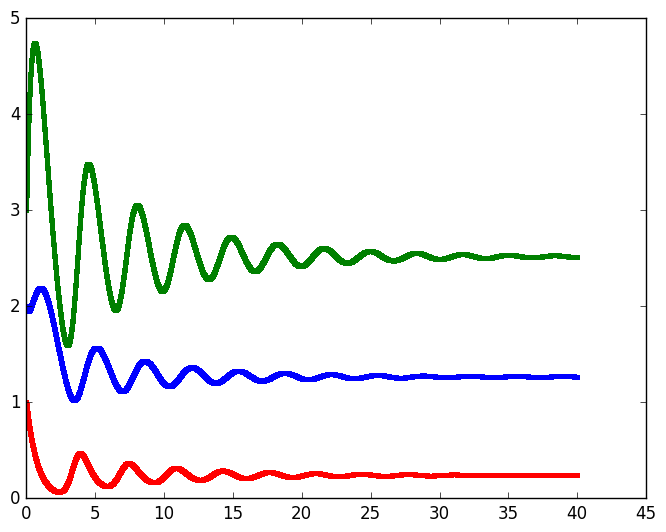

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000019712B38>

In [53]:
plot(t,R,"r.")
plot(t,T, "b.")
plot(t,L, "g.")

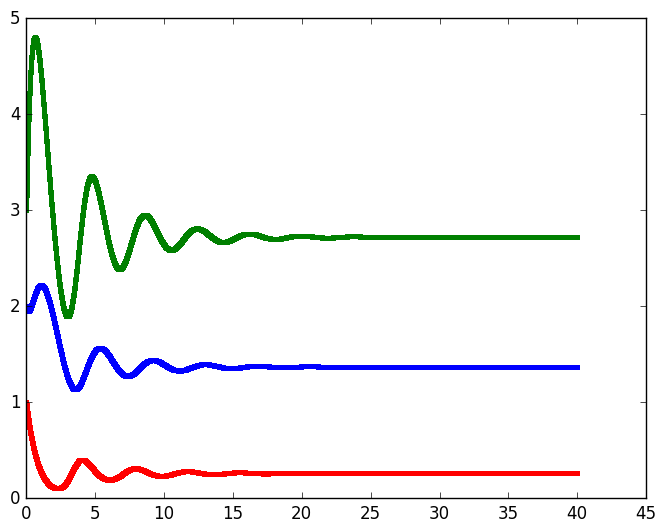

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001FA7C4A8>

In [57]:
plot(t_5,R_5,"r.")
plot(t_5,T_5, "b.")
plot(t_5,L_5, "g.")

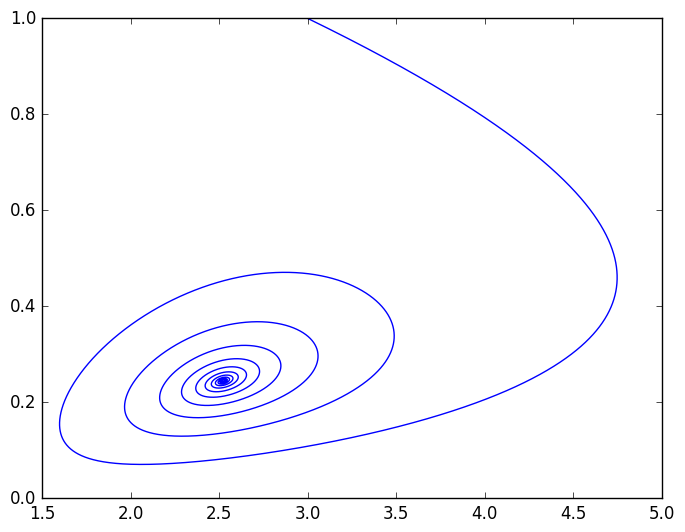

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000019A7BF98>

In [54]:
plot(L,R)

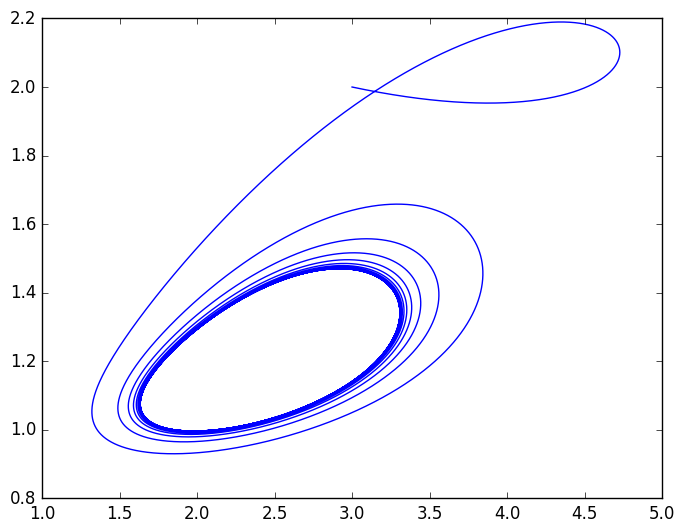

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001962EEB8>

In [48]:
plot(L,T)

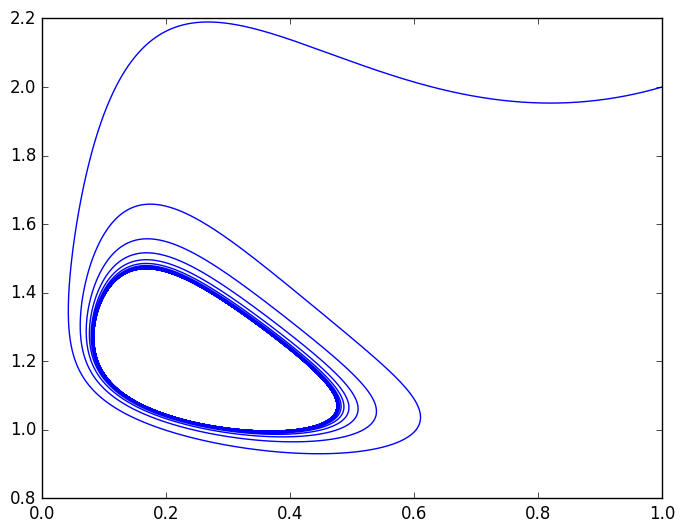

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001969DBA8>

In [49]:
plot(R,T)

In [61]:
function Castration(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=0.5
    
    g1=10
    g2=0.0
    A=2
    K=1
    m=20
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        for i in range(1,p)
            fT=A/(K+TT^m)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Castration (generic function with 1 method)

In [62]:
t_castration_20=Castration(1.0,2.0,3.0,5,0.0,10.0)[1];
R_castration_20=Castration(1.0,2.0,3.0,5,0.0,10.0)[2];
L_castration_20=Castration(1.0,2.0,3.0,5,0.0,10.0)[3];
T_castration_20=Castration(1.0,2.0,3.0,5,0.0,10.0)[4];

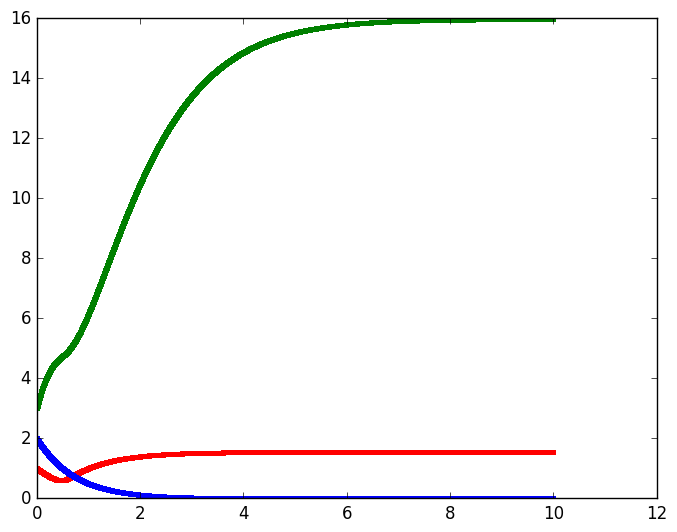

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000164E7898>

In [16]:
plot(t_castration,R_castration,"r.")
plot(t_castration,T_castration, "b.")
plot(t_castration,L_castration, "g.")

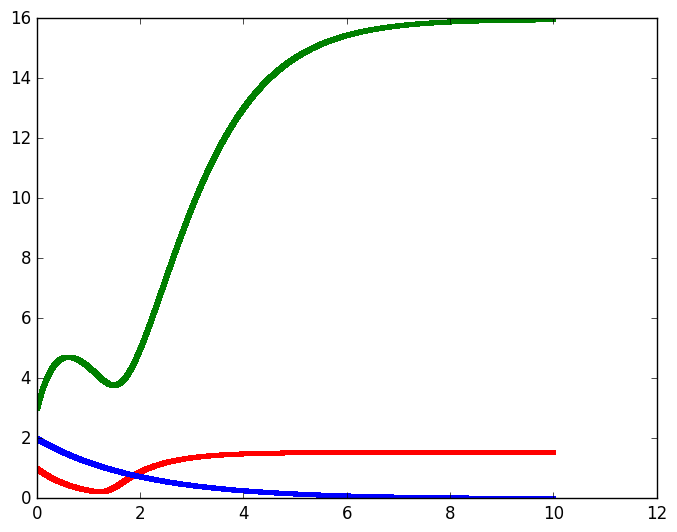

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001FA65E80>

In [63]:
plot(t_castration_20,R_castration_20,"r.")
plot(t_castration_20,T_castration_20, "b.")
plot(t_castration_20,L_castration_20, "g.")

Curiosamente se utiliza el mismo tipo de ecuación para describir la ezquisofrenia catatónica periódica. Cronin (1973,1976) propuso:

$$
f(t) = (c-ht)(1-H(t-c/h))
$$

Donde H(z) es la función de Heaveside y c,h son constantes.

In [17]:
#Heaviside
function H(x)
    if x>0
        return 1
    else
        return 0
    end
end

H (generic function with 1 method)

In [18]:
H(0)

0

In [19]:
function f_schizophrenia(c,h,t)
    (c-h*t)*(1-H(t-c/h))
end

f_schizophrenia (generic function with 1 method)

In [20]:
function Schizophrenia(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Schizophrenia (generic function with 1 method)

In [64]:
t_s=Schizophrenia(1.0,2.0,3.0,5,0.0,40.0)[1];
R_s=Schizophrenia(1.0,2.0,3.0,5,0.0,40.0)[2];
L_s=Schizophrenia(1.0,2.0,3.0,5,0.0,40.0)[3];
T_s=Schizophrenia(1.0,2.0,3.0,5,0.0,40.0)[4];

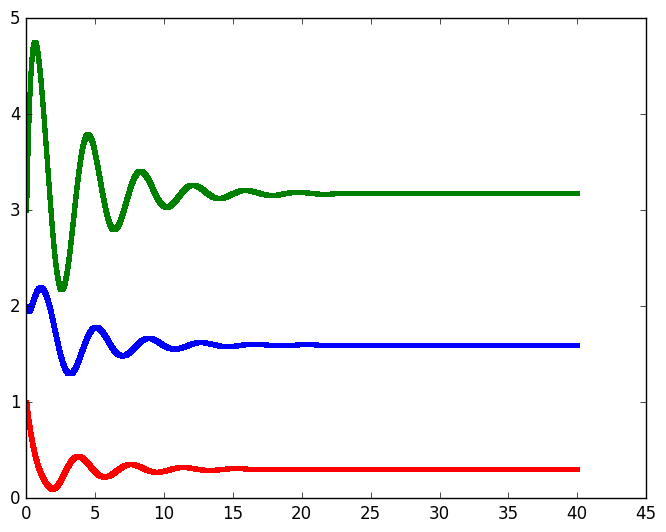

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001FD45E80>

In [65]:
plot(t_s,R_s,"r.")
plot(t_s,T_s, "b.")
plot(t_s,L_s, "g.")

In [23]:
function Schizophrenia_Pituitary_Repression(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    Wt=c*b3/h_f-0.5
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        WtT=Taylor1(Wt,p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i+WtT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Schizophrenia_Pituitary_Repression (generic function with 1 method)

In [24]:
Taylor1(2,58)+Taylor1([2,2,2],58)

 4 + 2 t + 2 t² + 𝒪(t⁵⁹)

In [25]:
t_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,40.0)[1];
R_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,40.0)[2];
L_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,40.0)[3];
T_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,40.0)[4];

Como dice el artículo para valores de $w_{t} > \frac{cb_{3}}{h} $ L y R se van a cero comprobando lo descrito en [2], y para valores menores se tiene una osiclación de esas variables. T por otro lado debe tender al valor de $ \frac{W_{t}}{b_{3}}  $

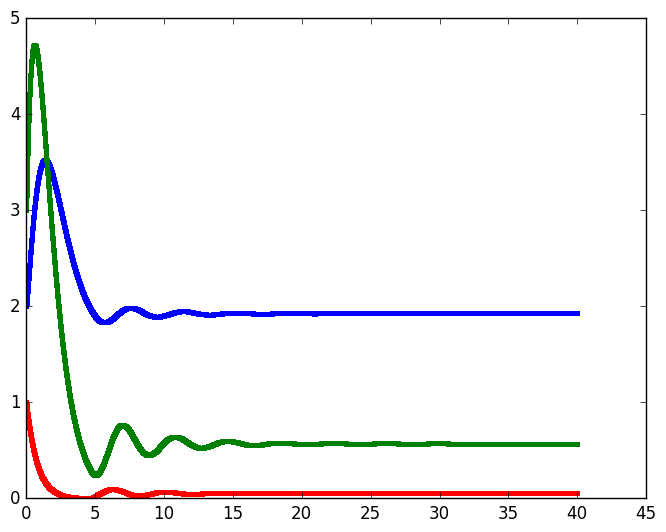

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001B0A99E8>

In [26]:
plot(t_sp,R_sp,"r.")
plot(t_sp,T_sp, "b.")
plot(t_sp,L_sp, "g.")

Referencias:

[1] Murray, J. D. 1989. Mathematical Biology. Volume 19. 

[2] Smith, William R. "Hypothalamic regulation of pituitary secretion of luteinizing hormone—II feedback control of gonadotropin secretion." Bulletin of Mathematical Biology 42.1 (1980): 57-78.

#### Pubertad

La pubertad está causada por uno o una combinación de los siguientes factores:

(i) Un incremento de la sensibilidad pituitaria para LHRH 

(ii) Un incremento de la sensibilidad gonadal para LH

(iii) Un incremento de la sensibilidad hipotálamica hacia la retroalimentación negativa de la testosterona

(iv) Un incremento en la tasa de secreción tónica de LHRH del hipotálamo

In [27]:
function Pubertad1(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        g1 = g1+3*h
    end
    return (t,R,L,T)
end

Pubertad1 (generic function with 1 method)

In [28]:
t_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[4];

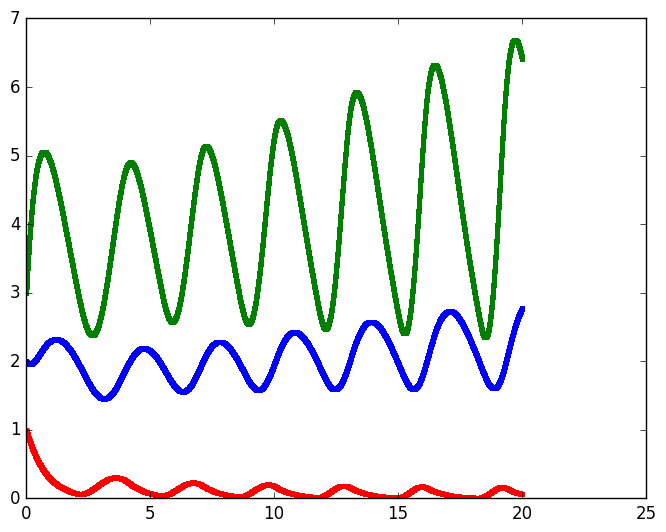

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001B24F358>

In [29]:
plot(t_p1,R_p1,"r.")
plot(t_p1,T_p1, "b.")
plot(t_p1,L_p1, "g.")

In [30]:
function Pubertad2(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        g2 = g2+3*h
    end
    return (t,R,L,T)
end

Pubertad2 (generic function with 1 method)

In [31]:
t_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[4];

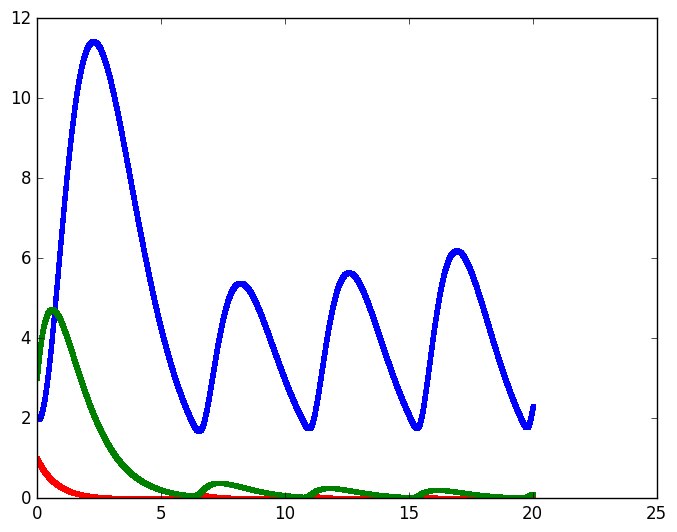

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001F11C198>

In [32]:
plot(t_p2,R_p2,"r.")
plot(t_p2,T_p2, "b.")
plot(t_p2,L_p2, "g.")

In [33]:
function Pubertad3(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        h_f = h_f+h
    end
    return (t,R,L,T)
end

Pubertad3 (generic function with 1 method)

In [34]:
t_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[4];

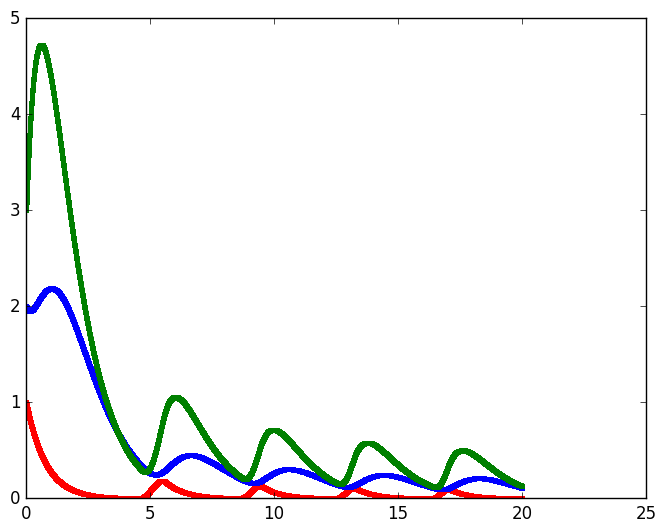

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001F992E80>

In [35]:
plot(t_p3,R_p3,"r.")
plot(t_p3,T_p3, "b.")
plot(t_p3,L_p3, "g.")

In [36]:
function Pubertad4(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        c = c + h
    end
    return (t,R,L,T)
end

Pubertad4 (generic function with 1 method)

In [37]:
t_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[4];

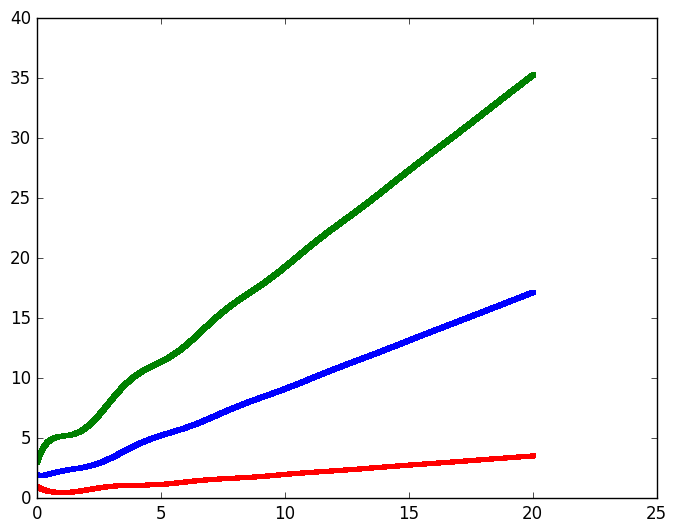

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001CBC4748>

In [38]:
plot(t_p4,R_p4,"r.")
plot(t_p4,T_p4, "b.")
plot(t_p4,L_p4, "g.")